# 1. Знакомимся с данными

# 2. Соединение таблиц по ключу

# ОБЪЕДИНЯЕМ ТАБЛИЦЫ БЕЗ ОПЕРАТОРОВ

✍ Существует несколько способов соединения таблиц. Мы познакомимся со всеми основными операторами, которые используются для этих нужд, но начнём с простого метода объединения таблиц — без операторов.

Чтобы соединить две таблицы между собой, достаточно записать названия таблиц через запятую в разделе **from**. Что произойдёт в таком случае?

<code>

SELECT *

FROM

    sql.teams,

    sql.matches
</code>

Каждая запись, которая есть в таблице teams, будет соединена с каждой записью в таблице matches.

Это действие также называют **декартовым произведением таблиц**.

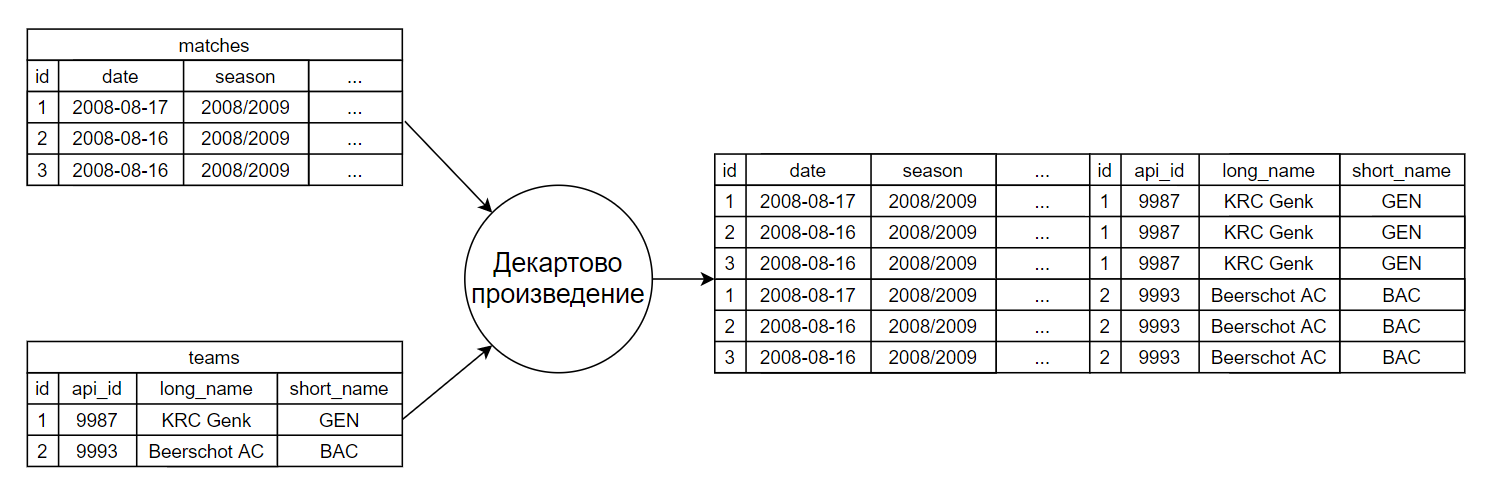

Действительно ли это произведение?

Легко проверить! В исходных таблицах teams и matches было 299 и 25083 записей соответственно. Если соединить каждую запись одной таблицы с каждой записью другой, получится 299 * 25083 записей в итоговой таблице.

В данном случае соединение таблиц не даёт практической пользы: мы получили очень много записей, которые никак не можем интерпретировать, потому что команды не соответствуют матчам.

Давайте исправим это. В таблице teams есть столбец api_id, а таблица matches содержит столбцы home_team_api_id и away_team_api_id — это **ключи** таблиц, по которым они соединяются.

**Ключ** — это поле (столбец) в таблице, которое позволяет однозначно идентифицировать запись (строку).

Чтобы соединить таблицы и получить данные о домашней команде по каждому матчу, добавим условие

<code>
where home_team_api_id = api_id.
</code>

---------------------

<code>

SELECT *

FROM

    sql.teams,

    sql.matches

WHERE home_team_api_id = api_id
</code>

Аналогично можем получить данные о гостевых командах: необходимо изменить условие на

<code>

where away_team_api_id = api_id.
</code>

--------------
<code>

SELECT *

FROM

    sql.teams,

    sql.matches

WHERE away_team_api_id = api_id
</code>

Итак, мы только что объединили таблицы по **ключу**.

Вы уже знакомы с ключами по таблице pokemon (там в этой роли выступал столбец id). Ключи нужны для того, чтобы иметь возможность не перепутать между собой различные записи.

→ Например, у нас есть несколько команд с одинаковым названием: Polonia Bytom, Widzew Łódź и Royal Excel Mouscron — хотя это разные команды, с разными id.
Кроме того, как мы уже смогли убедиться, ключи используются для соединения таблиц между собой.

**Ключи бывают двух основных типов:**

1. Primary — **первичный ключ** — служит для идентификации текущей таблицы и, как правило, идёт первым в списке столбцов. Всегда уникален: повторяющихся значений в основной таблице быть не может.
2. Foreign — **внешний ключ** — представляет собой ссылку на другую таблицу.

Как правило, названия ключей имеют «хвост», который позволяет их идентифицировать: например, _id, _rk, _cd, _pk (от primary_key), _fk (от foreign_key) и другие.

**Обратите внимание!** В данном датасете ключ api_id таблицы teams может быть использован в разных значениях. Его можно использовать для того, чтобы получить информацию о домашней (home) или гостевой (away) команде.

Вы могли заметить, что в последних двух запросах получилось очень много столбцов. Как и при работе с одиночной таблицей, мы можем выбирать, какие столбцы соединённой таблицы выводить.

С помощью известного нам запроса получим названия команд, игравших домашние матчи, и счёт матчей.

<code>

SELECT 

    long_name, 

    home_team_goals,

    away_team_goals

FROM

    sql.teams,

    sql.matches

WHERE home_team_api_id = api_id
</code>

# 3. Знакомимся с JOIN

✍ В прошлом юните для соединения таблиц мы использовали условие в разделе **where**, чтобы показать принцип работы оператора JOIN.

**JOIN** — это оператор SQL, который позволяет соединять таблицы по условию.

В качестве примера используем запрос из предыдущего юнита.

<code>

SELECT 

    long_name,

    home_team_goals,

    away_team_goals

FROM

    sql.teams,

    sql.matches

WHERE home_team_api_id = api_id
</code>

и запишем его с использованием JOIN.

<code>

SELECT 

    long_name,

    home_team_goals,

    away_team_goals

FROM    

    sql.teams

JOIN sql.matches on home_team_api_id = api_id
</code>

## СИНТАКСИС

Оператор JOIN упрощает процесс соединения таблиц.

Его синтаксис можно представить следующим образом:

<code>

SELECT

        столбец1,

	столбец2,

	...

FROM

	таблица1

JOIN таблица2 ON условие
</code>

Порядок присоединения таблиц **в данном случае** не важен — результат будет одинаковым.

С помощью JOIN можно соединить и более двух таблиц.

<code>

SELECT

        столбец1,

	столбец2,

	...

FROM

	таблица1

JOIN таблица2 ON условие

JOIN таблица3 ON условие
</code>

В таблицах, которые мы соединяем, могут быть одинаковые названия столбцов.

→ К примеру, столбец id есть и в таблице matches, и в таблице teams. Такой запрос не будет обработан.

<code>

SELECT

    id

FROM 

sql.teams

    JOIN sql.matches ON home_team_api_id = api_id
</code>

В результате должно появиться сообщение об ошибке вроде такого: "... column id is ambiguous ...".

?
Что же делать в таком случае?

Можно указать, откуда мы хотим запросить данные, записав название таблицы перед столбцом через точку.

<code>

SELECT

    teams.id

FROM 

    sql.teams

JOIN sql.matches ON home_team_api_id = api_id
</code>

Можно также выбрать и столбец из таблицы matches.

<code>

SELECT

    matches.id

FROM 

    sql.teams

JOIN sql.matches on home_team_api_id = api_id
</code>

Зачастую названия таблиц слишком длинные, так что использовать их неудобно.

Упростить обращение к различным таблицам можно, присвоив им сокращённые названия — **алиасы** (от англ. alias).

Синтаксис для указания алиаса такой же, как и для названия столбца.

<code>

SELECT

        столбец1,

	столбец2,

	...

FROM

	таблица1 AS короткое_название_1

JOIN таблица2 AS короткое_название_2 ON условие
</code>

Название записывается без пробелов и операторов.

Если необходимо записать название, в котором используются пробелы ("table 1"), то алиас можно обернуть в кавычки.

**Важно!** Обращаться по такому алиасу придётся также с помощью кавычек.

<code>

SELECT

	"table 1".столбец1,

	"table 2".столбец2,

	...

FROM

	таблица1 AS "table 1"

	JOIN таблица2 AS "table 2" ON условие
</code>

Использование таких алиасов считается плохой практикой как минимум по причине того, что обращаться с такими алиасами неудобно.

Вместо алиасов с кавычками рекомендуется давать простое короткое название на латинице, без специальных символов и пробелов. Если таблиц немного и все названия начинаются с разных букв, можно присваивать алиасы по первой букве.

Ключевое слово as, как и в названии столбца, можно опустить в большинстве СУБД.

<code>

SELECT

        столбец1 новое_название_столбца,

	столбец2 новое_название_столбца,

	...

FROM

	таблица1 короткое_название_1

JOIN таблица2 короткое_название_2 ON условие
</code>

Давайте попробуем проделать то же самое для наших таблиц.

Кажется, теперь мы можем соединить таблицы между собой и создать своё табло со счётом матчей, как на спортивных сайтах!

Давайте с помощью запроса SQL получим таблицу, содержащую:

* название домашней команды;
* количество забитых домашней командой голов;
* количество забитых гостевой командой голов;
* название гостевой команды.

<code>

SELECT

    h.long_name "домашняя команда",

    m.home_team_goals "голы домашней команды",

    m.away_team_goals "голы гостевой команды",

    a.long_name "гостевая команда" 

FROM

    sql.matches m

    JOIN sql.teams h ON m.home_team_api_id = h.api_id

    JOIN sql.teams a ON m.away_team_api_id = a.api_id
</code>

# 4. Фильтрация и агрегатные функции

## РАБОТА С ОБЪЕДИНЁННЫМИ ТАБЛИЦАМИ

✍ Соединять таблицы мы научились, теперь давайте научимся получать необходимые данные из нескольких таблиц ↓

Принцип построения запроса и порядок операторов такой же, как и с обычной таблицей.

Вспомним его:

<code>

SELECT... 

FROM... 

WHERE... 

GROUP BY... 

ORDER BY... 

LIMIT...

</code>

### ФИЛЬТРАЦИЯ ДАННЫХ

К соединённым таблицам применимы функции фильтрации данных.

Например, можно вывести id матчей, в которых команда Arsenal была гостевой.

<code>

SELECT 

    m.id

FROM

    sql.teams t

    JOIN sql.matches m ON m.away_team_api_id = t.api_id

WHERE long_name = 'Arsenal'
</code>

Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.

Например, результат запроса

<code>

SELECT 

	m.id id_1,

	m.season,

	t.id id_2,

	t.long_name

FROM

	sql.teams t

JOIN sql.matches m ON m.away_team_api_id = t.api_id
</code>

можно разделить на две разные части

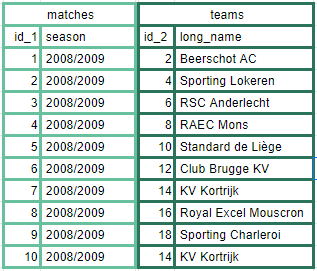

Одна часть — таблица matches с алиасом m, вторая — teams с алиасом t, но после соединения они являются одной таблицей.

Таким образом, если вы отфильтруете данные по одной части таблицы, то другая, соединённая, часть пропадёт вместе с ней.

Также мы можем отфильтровать записи сразу по двум таблицам.


Например, можно оставить только записи, в которых короткое название домашней команды GEN и матчи сезона 2008/2009.

<code>

SELECT *

FROM    

    sql.matches m

    JOIN sql.teams t on t.api_id = m.home_team_api_id

WHERE

    t.short_name = 'GEN'

    AND m.season = '2008/2009'
</code>

### АГРЕГАЦИЯ ДАННЫХ

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.


Например, мы можем вывести сумму голов по командам для матчей, где команда выступала в гостях.

<code>

SELECT

    t.long_name,

    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals

FROM

    sql.matches m

    JOIN sql.teams t ON m.away_team_api_id = t.api_id 

GROUP BY t.id
</code>

**Обратите внимание!** В данном запросе была использована группировка по столбцу id таблицы teams, хотя этот столбец не выводится в запросе. Это необходимо для того, чтобы команды с одинаковым названием, если такие найдутся, не группировались между собой. Группировка по названию команды в данном запросе будет неверной, так как есть несколько команд с одинаковым полным названием — мы говорили об этом в начале модуля.

Также, применяя агрегатные функции к соединённым таблицам, обращайте внимание на указание алиасов (или таблиц) при группировке и указании столбцов агрегатных функций. В нашей соединённой таблице есть два столбца с названием id, и если бы мы сформировали запрос без указания таблицы, как указано ниже, то...

<code>

SELECT

    t.long_name,

    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals

FROM 

    sql.matches m

    JOIN sql.teams t ON m.away_team_api_id = t.api_id

GROUP BY id
</code>

система выдала бы уже знакомую нам ошибку: "... column "id" is ambiguous ...".

Мы можем использовать оператор HAVING для фильтрации сгруппированных данных.

Поставим задачу — вывести таблицу с суммарным количеством забитых голов в матчах по командам и сезонам для команд, в которых суммарное количество голов в матчах сезона больше 100.


Для начала посчитаем общее количество голов в матчах по сезонам.

<code>

SELECT

    m.season,

    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals

FROM sql.matches m

GROUP BY m.season
</code>


Затем добавим таблицу с командами, группировку по командам и условие фильтрации.

<code>

SELECT

    m.season,

    t.long_name,

    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals

FROM sql.matches m

JOIN sql.teams t ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id

GROUP BY m.season, t.id

HAVING SUM(m.home_team_goals) + SUM(m.away_team_goals) > 100
</code>

# 5. Способы соединения таблиц

## ОПЕРАТОРЫ

✍ В прошлых юнитах для соединения таблиц мы использовали один оператор — JOIN. В действительности же он не один: существует несколько различных видов соединений (join’ов) — давайте посмотрим, какие ↓

### INNER JOIN

INNER JOIN — это тот же JOIN (слово inner в операторе можно опустить).

Принцип работы этого оператора визуализирует изображение ниже.

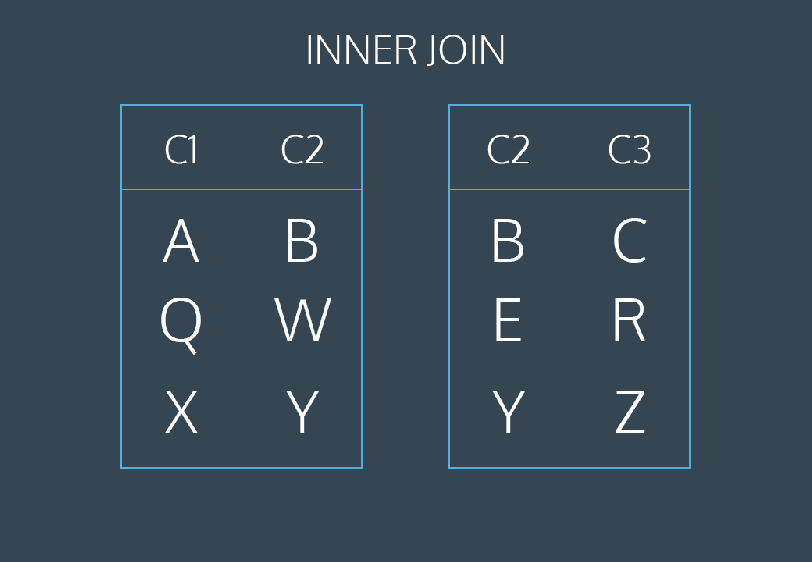

Для **INNER JOIN** работает следующее **правило**: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

Рассмотрим на примере нашего датасета. 

В таблице teams есть данные о 299 различных командах — можем проверить это с помощью запроса.

<code>

SELECT 

COUNT(DISTINCT id)

FROM sql.teams
</code>

или

<code>

SELECT 

COUNT(DISTINCT api_id)

FROM sql.teams
</code>

Теперь добавим к teams таблицу с матчами.

<code>

SELECT 

COUNT(DISTINCT t.id) 

FROM 

sql.teams t

JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
</code>


И в таблице останется уже не 299 команд, а только 292.

?
Почему?

Дело в том, что таблица sql.matches по какой-то причине не содержит информацию о командах Lierse SK, KVC Westerlo, KAS Eupen, Club Brugge KV, KV Oostende, RSC Anderlecht и Hull City, зато они есть в таблице sql.teams. Возможно, эти команды не участвовали ни в одном матче или записи по этим матчам были удалены.

### LEFT OUTER JOIN И RIGHT OUTER JOIN

Также существуют схожие друг с другом типы соединения — LEFT JOIN и RIGHT JOIN (слово outer в операторе можно опустить).

Принцип работы оператора можно описать так:

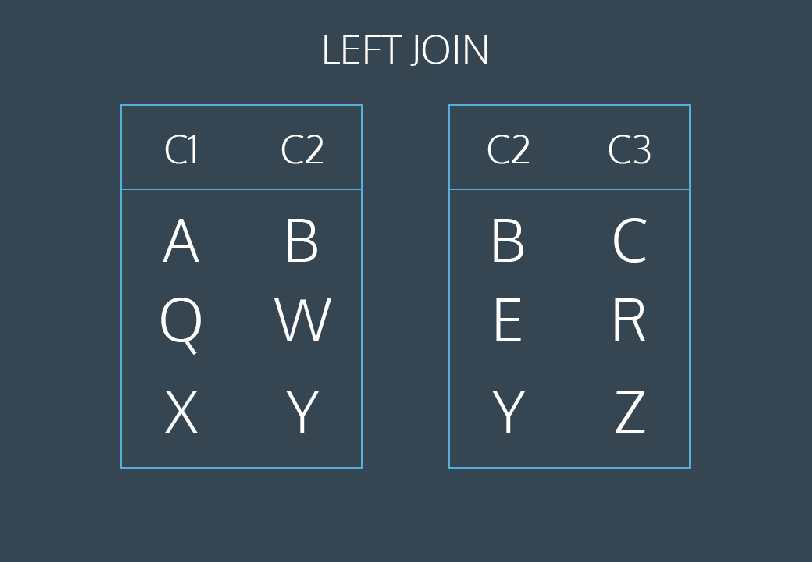

Для LEFT JOIN работает следующее **правило**: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение **NULL**.

LEFT JOIN может быть полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

?
Почему соответствий может не быть?

Причины могут быть разные, назовём две основные:

1. Различная бизнес-логика таблиц.

    **Пример**: в интернет-магазине почти всегда можно оформить заказ с промокодом. Вполне вероятно, что информация о промокодах хранится в отдельной таблице, но при этом не для каждого заказа будет существовать промокод, поскольку покупку можно оформить и без него.

2. Разное время обновления таблиц.

    **Пример**: клиент зарегистрировался на сайте интернет-магазина и оформил заказ. Данные о регистрации клиентов могут обновляться в базе данных раз в неделю, а о заказах — раз в сутки.

→ Поставим следующую задачу: вывести полные названия команд, данных по которым нет в таблице matches.

Для начала посмотрим на результат запроса после соединения.

<code>

SELECT

    t.long_name,

    m.id

FROM sql.teams t

LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id

ORDER BY m.id DESC
</code>

**Вывод**: в таблице teams сохранились все записи, а в таблице matches есть пустые строки.

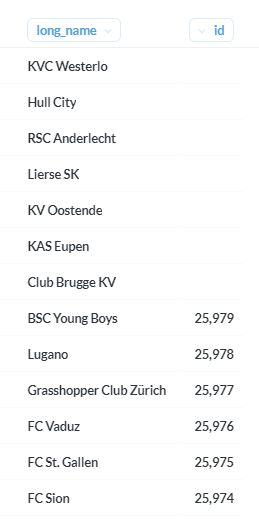

Теперь, чтобы выбрать такие команды, которые не принимали участия в матчах, достаточно добавить условие where m.id is null (или любое другое поле таблицы matches).

<code>

SELECT

    t.long_name

FROM 

    sql.teams t

LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id

WHERE m.id IS NULL
</code>

**Обратите внимание!** Если мы добавим какой-либо фильтр по значению для таблицы matches, то LEFT JOIN превратится в INNER JOIN, поскольку для второй таблицы станет необходимым присутствие значения в строке.

<code>

SELECT

    t.long_name 

FROM sql.teams t

LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id

WHERE

    m.season = '2008/2009'

AND t.long_name = 'KAS Eupen'
</code>

В ответе Metabase получим No results!, так как вместе с фильтром m.season = '2008/2009' исчезли все строки, значения которых **NULL**.

С LEFT JOIN также работают агрегатные функции, что позволяет не потерять значения из левой таблицы. Например, мы можем вывести сумму голов команд по гостевым матчам.

<code>

SELECT

    t.long_name,

    SUM(m.away_team_goals) total_goals

FROM   

    sql.teams t

LEFT JOIN sql.matches m ON t.api_id = m.away_team_api_id

GROUP BY t.id

ORDER BY 2 DESC
</code>

**Обратите внимание!** При применении функций SUM, MIN, MAX, AVG к полям со значением **NULL** в результате получится **NULL**, а не 0. А при использовании функции COUNT, наоборот, получится 0.

При использовании RIGHT JOIN сохраняется та же логика, что и для LEFT JOIN, только за основу берётся правая таблица.

Чтобы из LEFT JOIN получить RIGHT JOIN, нужно просто поменять порядок соединения таблиц.

Вообще, применение RIGHT JOIN считается плохим тоном, так как язык SQL читается и пишется слева направо, а такой оператор усложняет чтение запросов.

### FULL OUTER JOIN

Оператор FULL OUTER JOIN объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

FULL OUTER JOIN может быть полезен в ситуациях, когда схема данных недостаточно нормализована и не хватает таблиц-справочников.

**Пример**: в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа.

Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать FULL OUTER JOIN для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по id пользователя.

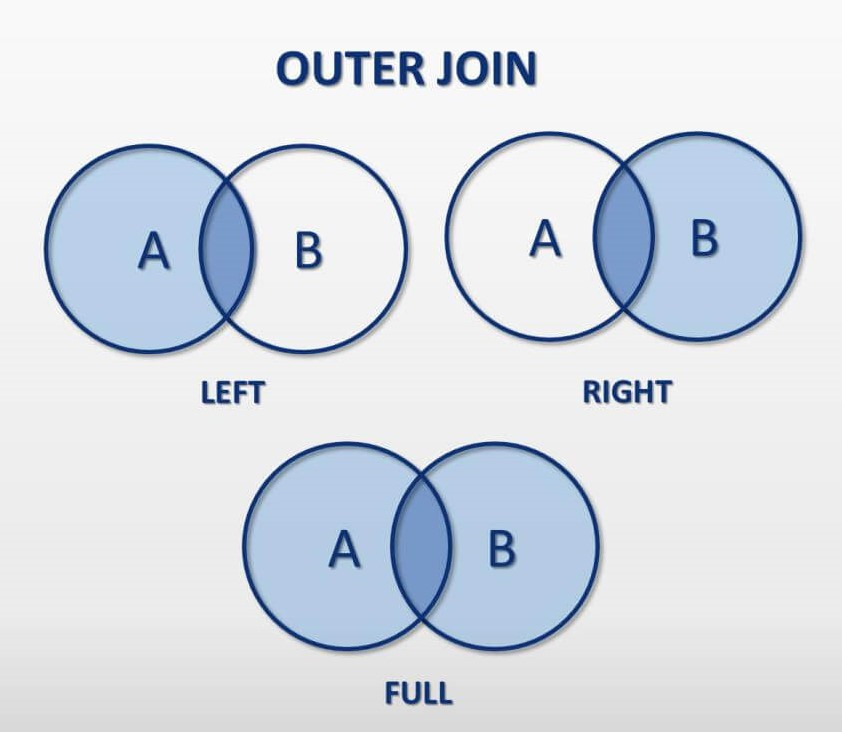

Синтаксис FULL OUTER JOIN аналогичен другим JOIN.

<code>

SELECT 

…

FROM

	table1

FULL OUTER JOIN table2 ON условие
</code>

### CROSS JOIN

На самом деле с этим оператором соединения таблиц вы познакомились в самом начале текущего модуля.

CROSS JOIN соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, даёт декартово произведение.

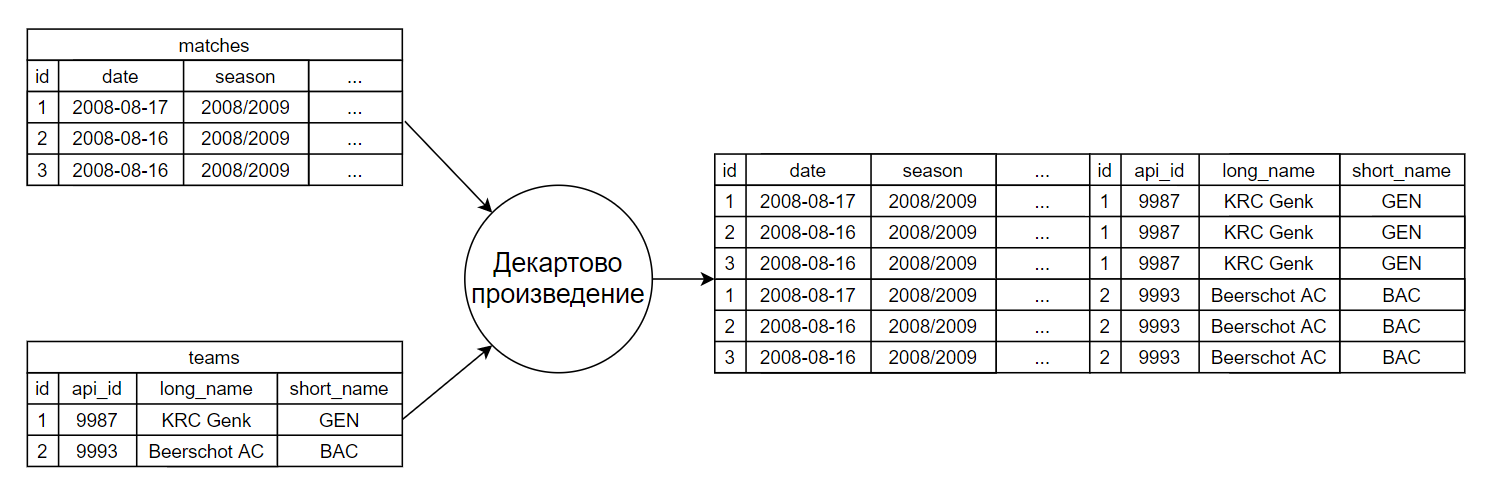

В начале модуля вы использовали этот оператор, записывая таблицы через запятую.

<code>

SELECT *

FROM

    sql.teams,

    sql.matches
</code>

Этот же запрос можно записать с использованием CROSS JOIN.

<code>

SELECT *

FROM

    sql.teams

    CROSS JOIN sql.matches
</code>

**Обратите внимание!** Условие для CROSS JOIN, в отличие от других операторов, не требуется.

Также этот запрос можно записать с помощью INNER JOIN с условием **on true** — результат будет тот же.

<code>

SELECT *

FROM

    sql.teams

    JOIN sql.matches ON TRUE

</code>

CROSS JOIN может быть полезен, когда необходимо создать таблицу фактов.

Например, с помощью такого запроса мы можем получить все возможные комбинации полных названий команд в матчах.

<code>

SELECT

    DISTINCT

    t1.long_name home_team, 

    t2.long_name away_team

FROM

    sql.teams t1

    CROSS JOIN sql.teams t2
</code>

### NATURAL JOIN

Ключевое слово natural в начале оператора JOIN позволяет не указывать условие соединения таблиц — для соединения будут использованы столбцы с одинаковым названием из этих таблиц.

NATURAL JOIN можно использовать с любыми видами соединений, которые требуют условия соединения:

* → NATURAL INNER JOIN (возможна запись NATURAL JOIN);
* → NATURAL LEFT JOIN;
* → NATURAL RIGHT JOIN;
* → NATURAL FULL OUTER JOIN.

При использовании NATURAL JOIN прежде всего стоит обратить внимание на ключи таблиц. Для наших таблиц teams и matches этот вид соединения не подойдёт, так как общим для обеих таблиц является столбец id, но таблицы соединяются по другим столбцам.

Когда у таблиц есть несколько столбцов с одинаковыми именами, при NATURAL JOIN условие соединения будет применено на все столбцы с одинаковыми именами.

То есть для таблиц table1 и table2

<code>

table1: id, name, ...


table2: id, name, ...
</code>


запрос

<code>

SELECT 

…

FROM 

         table1 

NATURAL JOIN table2
</code>

будет равнозначен запросу

<code>

SELECT

…

FROM 

         table1 t1

INNER JOIN table2 t2 ON t1.id = t2.id AND t1.name = t2.name
</code>

### ОБЩАЯ ЛОГИКА ПОСТРОЕНИЯ ЗАПРОСА С JOIN

При построении запроса с несколькими JOIN старайтесь идти слева направо. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса.

Например, для ответа на вопрос: «Какая команда сыграла больше всех матчей в сезоне 2010/2011?» в качестве центральной лучше выбрать таблицу с командами.

А для ответа на вопрос: «В каком сезоне участвовало больше всего команд?» — таблицу с матчами.

Стоит отметить, что из рассмотренных видов соединений чаще всего используются INNER JOIN и LEFT JOIN. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.

# 6. Итоги. Закрепление знаний

✍ В этом модуле вы познакомились с разными способами вертикального соединения таблиц.

Теперь вы умеете:

* соединять таблицы по ключу;
* соединять таблицы с помощью оператора JOIN;
* использовать разные виды JOIN;
* применять агрегации к объединённым таблицам и фильтровать вывод.

Вам предстоит выполнить пять заданий на написание SQL-запросов по определённым условиям.

Если какую-то задачу не получается выполнить с первого раза — не отчаивайтесь. Соединение таблиц — одна из самых сложных тем для освоения и эффективного использования языка SQL.

Если при выполнении заданий возникли трудности, попробуйте вернуться к материалам и посмотреть примеры запросов для разных задач.

Также вы всегда можете написать в Slack и спросить совета у менторов или сокурсников.

ОТЛИЧНО, ВЫ СПРАВИЛИСЬ!

Однако мы предлагаем немного задержаться в этом модуле.

Объединение таблиц — одна из ключевых тем. Знания в этой области нередко проверяют на собеседованиях, поэтому уделите отработке навыков особое внимание. Ниже вы найдёте несколько наиболее распространённых вопросов по объединению таблиц.

**Важно**! Это задания на самопроверку, они необязательные и мы не будем оценивать качество их решения. Однако настоятельно рекомендуем вам попробовать выполнить их самостоятельно, прежде чем открывать ответ.

Вопрос 1

Задание от Лудамилы Джанда (Ludamila Janda), 
Data Scientist в Amplify

Объясните разницу между левым (LEFT) и внутренним (INNER) соединениями.

ПРИМЕР ОТВЕТА
Соединения — это способы объединения данных из двух разных таблиц (левой и правой) в новую.

Принцип работы соединений заключается в объединении строк между двумя таблицами; набор ключевых столбцов используется для поиска данных в двух одинаковых таблицах, которые необходимо соединить.

В случае левого соединения каждая строка из левой таблицы появляется в полученной таблице, но строки из правой появляются, только если значения в их ключевых столбцах отображаются в левой. При внутреннем соединении обе строки из левой и правой таблиц появляются, только если есть совпадающая строка в другой таблице.

На практике вы можете воспринимать левое соединение как добавление данных из правой таблицы к левой, если она существует (например, с использованием правой таблицы в качестве подстановочной). Внутреннее соединение больше похоже на поиск всех общих данных и создание новой таблицы только из пар.

Обратите внимание, что в нашем варианте ответа мы не упоминали какие‐либо сложности, связанные с появлением повторяющихся строк в данных. Возможно, о них стоит упомянуть, потому что повторяющиеся строки могут повлиять на результат, но с большей долей вероятности эта информация может увести вас от мысли, которую вы пытаетесь донести до интервьюера.

Лудамила Джанда любит задавать этот вопрос при наборе кандидатов на роли джуниоров, потому что это не вопрос с подвохом, а минимально необходимые знания. Она считает, что можно многое узнать по тому, как кандидат решает дать ответ. Правильно ответить можно по‐разному: процитировать учебник, используя сложные выражения, или объяснить всё простым языком, не вдаваясь в крайности.

Вопрос 2

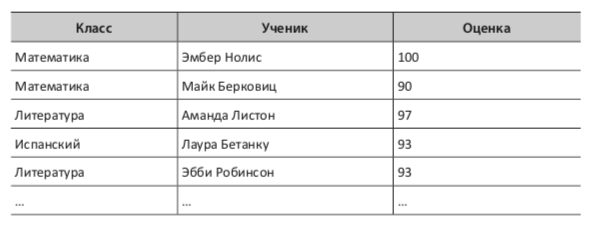

Перед вами школьная таблица TABLE_A с оценками от 0 до 100, выставленными ученикам нескольких классов. 



Как бы вы рассчитали максимальную оценку в каждом классе?

ПРИМЕР ОТВЕТА
Запрос для поиска наивысшей оценки в каждом классе может выглядеть так:

<code>

SELECT 

  CLASS, 

  MAX(GRADE) INTO TABLE_B 

FROM 

  TABLE_A 

GROUP BY 

  CLASS
</code>

Этот запрос группирует данные по каждому классу, а затем находит максимальное значение. Он дополнительно сохраняет результаты в новую таблицу (TABLE_B), чтобы их можно было запросить позже.

У соискателей этот вопрос обычно вызывает трудности. Одна из причин — непонимание, что именно нужно группировать (в данном случае переменную класса). Другая — в том, что вопрос кажется настолько простым, что соискатели начинают слишком усложнять ответ и упускают простое решение.

Если вы услышали вопрос, который кажется вам слишком лёгким, вполне возможно, что таким он и является.

К слову, строка INTO TABLE_B была совершенно необязательной, но она хорошо подготовит вас к следующему вопросу.

Это один из простейших вопросов по SQL: он проверяет, имеете ли вы базовое представление о группировке в SQL. Если решение не кажется вам очевидным, то самое время повторить, как группирующие переменные работают в SQL.

Вопрос 3

Рассмотрим таблицу из предыдущего вопроса.

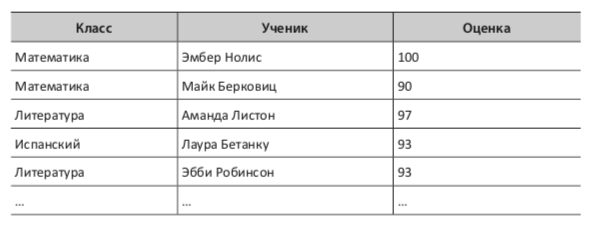

Как найти не только самую высокую оценку в каждом классе и учащегося, получившего её?

Предполагая, что у нас есть результат предыдущего запроса, сохранённый в TABLE_B, мы можем использовать его в этом решении:

<code>

SELECT

  a.CLASS, 

  a.GRADE, 

  a.STUDENT 

FROM 

  TABLE_A a 

  INNER JOIN TABLE_B b ON a.CLASS = b.CLASS 

  AND a.GRADE = b.GRADE
</code>

Этот запрос выбирает всех учащихся и их оценки из исходной таблицы TABLE_A, где указаны классы и оценки, которые отображаются в таблице максимальных значений TABLE_B. Внутреннее соединение работает как фильтр, сохраняя только максимальные комбинации классов/оценок, потому что только в этом случае оценка появляется в таблице TABLE_B.

В качестве альтернативы можно было бы использовать подзапрос, чтобы сделать то же самое, не вызывая таблицу TABLE_B:

<code>

SELECT 

  a.CLASS, 

  a.GRADE, 

  a.STUDENT 

FROM 

  TABLE_A a 

  INNER JOIN (

    SELECT 

      CLASS, 

      MAX(GRADE) 

    FROM 

      TABLE_A 

    GROUP BY 

      CLASS

  ) b ON a.CLASS = b.CLASS 

  AND a.GRADE = b.GRADE
</code>

Примечание. Подзапросы мы будем проходить чуть позднее, так что, ознакомившись сейчас, вернитесь к этому варианту, когда изучите синтаксис подзапросов.

Как видите, эту задачу можно решить несколькими способами, но любое решение почти наверняка требует более одного запроса из таблицы TABLE_A, поэтому этот вопрос может легко поставить в тупик. На бумаге решение может показаться лёгким, но додуматься до него во время интервью может быть непросто. Даже если вы ответили неправильно, это не значит, что вы провалились.

Решение не даёт каких‐либо специфичных случаев для привязки к максимальному значению. В примере будут возвращены строки для нескольких студентов. Возможно, стоит указать на этот факт интервьюеру, потому что так вы показываете, что обращаете внимание на пограничные случаи.